<a href="https://colab.research.google.com/github/tanish36/Tensorflow-Projects/blob/master/DogBreedClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_hub as hub

TensorFlow 2.x selected.


# Loading Data

In [0]:
# install wget for downloading data from the project site
!pip install wget
import wget

In [0]:
# WARNING - As the data file is large, a few checks are disabled
# during download. If in any DOUBTS, download data using your 
# own security measures
! wget --no-check-certificate -r 'https://drive.google.com/uc?export=download&confirm=5m61&id=1JN6XXdp_U9eB5ylglvr8JiqLvo7nHqAQ' -O dogbreed

will be placed in the single file you specified.

--2020-03-20 11:22:07--  https://drive.google.com/uc?export=download&confirm=5m61&id=1JN6XXdp_U9eB5ylglvr8JiqLvo7nHqAQ
Resolving drive.google.com (drive.google.com)... 74.125.195.101, 74.125.195.102, 74.125.195.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘dogbreed’

dogbreed                [ <=>                ]   3.21K  --.-KB/s    in 0s      

2020-03-20 11:22:08 (35.1 MB/s) - ‘dogbreed’ saved [3283]

Loading robots.txt; please ignore errors.
--2020-03-20 11:22:08--  https://drive.google.com/robots.txt
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘dogbreed’

dogbreed                [ <=>                ]     570  --.-KB/s    in 0s      

2020-03-20 11:22:08 (128 MB/s) - ‘dogbreed’ saved [570]

--2020-

In [0]:
# Extract file contents
!unzip dogbreed

Streaming output truncated to the last 5000 lines.
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/841463629c4833816e216cbb041c2778.jpg  
  inflating: train/84

In [0]:
# Check the labels
import pandas as pd
labels_csv = pd.read_csv("/content/labels.csv")
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
# Examine the table 
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,f056ee6bc913fba2697dabf37c1c8531,scottish_deerhound
freq,1,126


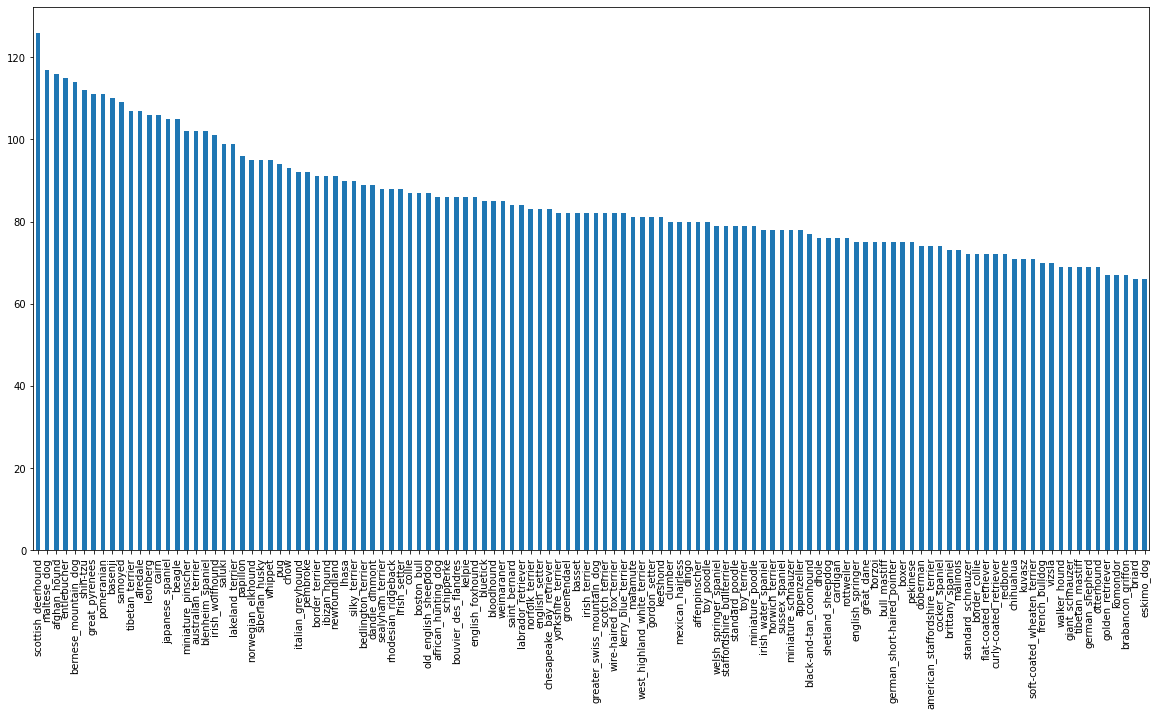

In [0]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

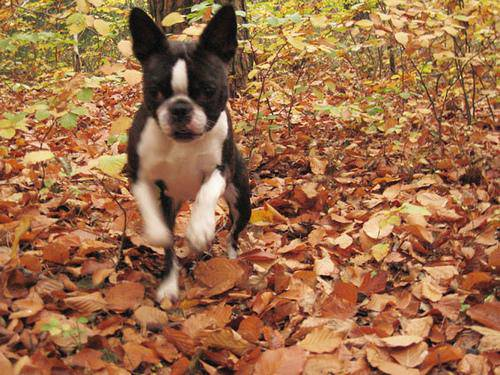

In [0]:
# print sample image
from IPython.display import display, Image
Image("/content/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

# Setting up data paths

In [0]:
# Define our training file path for ease of use
train_path = "/content/train"

In [0]:
# Create pathnames from image ID's
filenames = [train_path + '/'+fname + ".jpg" for fname in labels_csv["id"]]

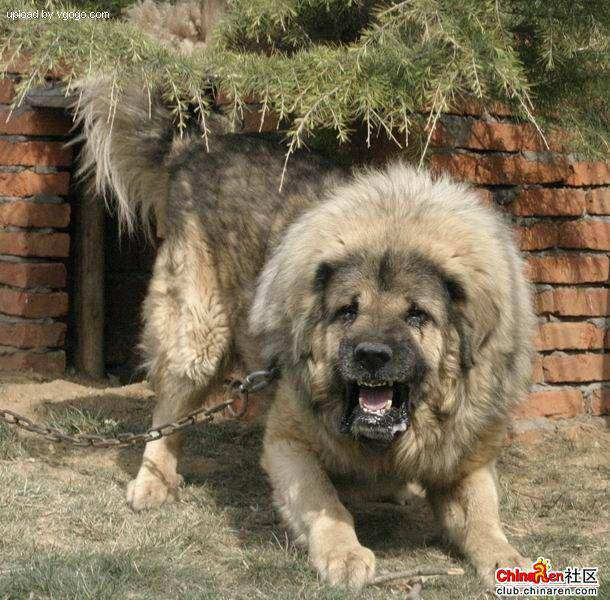

In [0]:
# Check an image directly from a filepath
Image(filenames[9000])

In [0]:
# Extract unique labels
import numpy as np
labels = labels_csv["breed"].to_numpy()
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [0]:
# print categories
list(unique_breeds)

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [0]:
# Encode target labels with values between 0 and 120
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder().fit_transform(labels).reshape(-1,1)
labels

array([[19],
       [37],
       [85],
       ...,
       [ 3],
       [75],
       [28]])

In [0]:
# Use onehotencoding to convert categorical values
from sklearn.preprocessing import OneHotEncoder
boolean_labels = OneHotEncoder().fit_transform(labels).toarray()

In [0]:
# Examine sample record
boolean_labels[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [0]:
# Setup variables for featues and labels
X = filenames
y = boolean_labels

In [0]:
# Create training/validation datasets
from sklearn.model_selection import train_test_split

# Split them into training and validation 
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Preprocessing Images

In [0]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  
  return image

In [0]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

# Creating Batches of Data

In [0]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y = None, batch_size = BATCH_SIZE, data_type = 1):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it 
  if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we don't have labels
  if data_type == 3:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif data_type == 2:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function 
    # is faster than shuffling images
    data = data.shuffle(buffer_size = len(x))

    # Create (image, label) tuples 
    # (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
    
  return data_batch

# Visualizing data batch

In [0]:
# Function for viewing images in a data batch
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure (figsize = (10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn grid lines off
    plt.axis("off")

# Defining Model

In [0]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [0]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, 
                 model_url = MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # TensorFlow Hub layer
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # output layer
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), 
      optimizer=tf.keras.optimizers.Adam(), 
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE) 
    
  return model

# Model Summary

In [0]:
# Create a model and print its summary
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


# Creating Datasets

In [0]:
# Create training dataset Tensor
train_data = create_data_batches(X_train, y_train)

Creating training data batches...


In [0]:
# Create validation dataset Tensor
val_data=create_data_batches(X_val,y_val)

Creating training data batches...


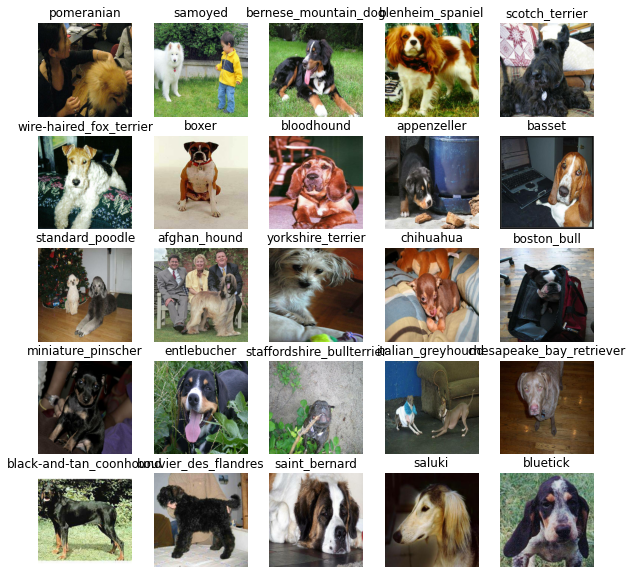

In [0]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

# Setting up TensorBoard

In [0]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [0]:
!rm -rf ./logs/  # cleaning the previous log

In [0]:
import datetime
import os

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("logs",
                        # Timestamp the log
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [0]:
# TensorBoard callback
model_tensorboard = create_tensorboard_callback()

# Early stopping callback
model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                        # stops after 3 rounds 
                                                        # of no improvements
                                                             patience=3)

# Model Training

In [0]:
# Construct model
model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
NUMBER_OF_EPOCHS = 100
model.fit(x = train_data,
               epochs = NUMBER_OF_EPOCHS,
               validation_data = val_data,
               callbacks = [model_tensorboard, 
                            model_early_stopping])

Train for 256 steps, validate for 64 steps
Epoch 1/100
  1/256 [..............................] - ETA: 36:43 - loss: 5.9181 - accuracy: 0.0000e+00WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.186558). Check your callbacks.


256/256 [==============================] - 41s 160ms/step - loss: 1.5063 - accuracy: 0.6391 - val_loss: 0.7305 - val_accuracy: 0.7809
Epoch 2/100
256/256 [==============================] - 33s 129ms/step - loss: 0.4113 - accuracy: 0.8811 - val_loss: 0.6511 - val_accuracy: 0.8068
Epoch 3/100
256/256 [==============================] - 34s 134ms/step - loss: 0.2320 - accuracy: 0.9429 - val_loss: 0.6544 - val_accuracy: 0.8020
Epoch 4/100
256/256 [==============================] - 32s 124ms/step - loss: 0.1480 - accuracy: 0.9702 - val_loss: 0.6536 - val_accuracy: 0.8108
Epoch 5/100
256/256 [==============================] - 33s 129ms/step - loss: 0.1015 - accuracy: 0.9832 - val_loss: 0.6568 - val_accuracy: 0.8117
Epoch 6/100
256/256 [==============================] - 34s 135ms/step - loss: 0.0720 - accuracy: 0.9901 - val_loss: 0.6825 - val_accuracy: 0.8068
Epoch 7/100
256/256 [==============================] - 35s 135ms/step - loss: 0.0551 - accuracy: 0.9941 - val_loss: 0.6819 - val_accurac

In [0]:
%tensorboard --logdir logs


# Evaluating Model Performance

In [0]:
# Evaluate performance on validation data
model.evaluate(val_data) 

# Predicting Images in Test Data

In [0]:
# set up path to test images
test_path = "/content/test"
test_filenames = [test_path +'/'+ fname for fname in os.listdir(test_path)]
# prepare test dataset
test_data = create_data_batches(test_filenames, data_type = 3)

In [0]:
# Make predictions on test data
predictions = model.predict(test_data,
                                      verbose=1)

In [0]:
# check how many images are tested?
predictions.shape

In [0]:
# Print the predictions for first image
predictions[0]

In [0]:
# the max probability value predicted by the model
print(f"Max value: {np.max(predictions[0])}") 
# the index where the max value in predictions[0] occurs
print(f"Max index: {np.argmax(predictions[0])}") 
# the predicted label
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

# Visualizing Prediction Results

In [0]:
# Function to plot image and the prediction
def plot_pred(prediction_probabilities, images):
  image = process_image(images)
  pred_label = unique_breeds[np.argmax(prediction_probabilities)]  
  plt.imshow(image)
  plt.axis('off')
  plt.title(pred_label)

In [0]:
# function to print bar chart of prdictions
def plot_pred_conf(prediction_probabilities):
  top_10_pred_indexes = prediction_probabilities.argsort()[-10:][::-1]
  top_10_pred_values = prediction_probabilities[top_10_pred_indexes]
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  top_plot[0].set_color("green")


In [0]:
# print results for first three predictions
num_rows = 3
plt.figure(figsize = (5 * 2, 5 * num_rows))
for i in range(num_rows):
  plt.subplot(num_rows, 2, 2*i+1)
  plot_pred(prediction_probabilities=predictions[i],
            images=test_filenames[i])

  plt.subplot(num_rows, 2, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions[i])
plt.tight_layout(h_pad=1.0)
plt.show()

# Predicting Unseen Image

In [0]:
# download unseen image for testing
!pip install wget
url='https://drive.google.com/u/0/uc?id=1Z1XdGS6tLROh6zJZMxVpzd8kB3EbQ80o&export=download'
import wget 
wget.download(url,'tiger.jpg')

In [0]:
# preprocess the image and convert it to Tensor
data=create_data_batches(['/content/tiger.jpg'],batch_size=1,data_type=3)

In [0]:
# infer the image
result = model.predict(data)

In [0]:
# get the prediction
predict_class_index = np.argmax(result[0],axis=-1)
predict_class_name = unique_breeds[(predict_class_index)] 

In [0]:
# get prediction proability
result_proba = model.predict_proba(data,batch_size=None)

In [0]:
# Check the threshold for prediction value
if result_proba.max() > 0.7:
  print(pred_label)
else:
  print('Not a dog breed as the predicted probability is {}'.format(result_proba.max()))

# Training with Smaller Datasets

In [0]:
# array to hold the evaluation results
model_performances = []

# function for training the given model on specified
# number of images
def train_model (model, NUM_IMAGES):
  model.fit(x=train_data,
               epochs=NUM_EPOCHS,
               validation_data=val_data,
               callbacks=[model_tensorboard, 
                          model_early_stopping])

In [0]:
# Training
NUM_EPOCHS = 100
# Create models and test for 1000,2000, 3000, 4000 images
for NUM_IMAGES in range(1000, 5000, 1000):
  model = create_model()
  x_train,x_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=10)
  train_data=create_data_batches(x_train,y_train,batch_size=10)
  val_data=create_data_batches(x_val,y_val,batch_size=10,data_type=2)
  train_model(model,NUM_IMAGES)
  model_performances.append(model.evaluate(val_data))

In [0]:
# load the metrics in pandas dataframe
import pandas as pd
comp = pd.DataFrame(model_performances,index = [1000,2000,3000,4000], columns = ['val_loss', 'val_acc'])


In [0]:
# plot the table
import matplotlib.pyplot as plt
plt.style.use('ggplot')
comp.plot.bar()
plt.xlabel('number of images')
plt.ylabel('performance values')
plt.show()

# Saving and reloading a model

In [0]:
# Saving model
model.save('model.h5') #saving the model

In [0]:
# Loading model
from tensorflow.keras.models import load_model
model=load_model('model.h5',custom_objects={"KerasLayer":hub.KerasLayer})

In [0]:
# Summary of loaded model
model.summary()